In [1]:
import xarray as xr

from importlib import reload
import sys
sys.path.append('/home/students/4302001/arctic-connectivity/tools')
import plot
import lifeline
import matplotlib.pyplot as plt
import cartopy

In [11]:
# Run in case you're debugging
reload(plot)
reload(lifeline)

<module 'lifeline' from '/home/students/4302001/arctic-connectivity/tools/lifeline.py'>

In [3]:
# Specify paths to velocity field and mesh
#readdir_ocean = '/Users/daanreijnders/Datasets/'
#readdir_ice = '/Users/daanreijnders/Datasets/'

readdir_ice = '/data/oceanparcels/input_data/CESM/0.1_deg/control/ice/arctic/'
readdir_ocean = '/data/oceanparcels/input_data/CESM/0.1_deg/control/ocean/arctic/'
readdir_mesh = '/scratch/DaanR/fields/'

fieldfile_ocean_old = 'daily_CESM_0.1degree_controlrun_year_300_arctic_region_timed.nc'
fieldfile_ocean_new = 'daily_CESM_0.1degree_controlrun_year_300_arctic_timed_no_cord.nc'
fieldfile_ice = 'monthly_icefields_CESM_0.1degree_controlrun_year_300_arctic'
meshfile = 'POP_grid_lat1800plus.nc'

writedir = ''

In [4]:
U_field_old = xr.open_dataset(readdir_ocean+fieldfile_ocean_old)['UVEL_5m']
V_field_old = xr.open_dataset(readdir_ocean+fieldfile_ocean_old)['VVEL_5m']
U_field_new = xr.open_dataset(readdir_ocean+fieldfile_ocean_new)['UVEL_5m']
V_field_new = xr.open_dataset(readdir_ocean+fieldfile_ocean_new)['VVEL_5m']
POP_mesh = xr.open_dataset(readdir_mesh+meshfile)
ULAT = POP_mesh['U_LAT_2D']
ULON = POP_mesh['U_LON_2D']

In [5]:
U_field_old['time'][115] # Check timestamp associated with field at index 115

<xarray.DataArray 'time' ()>
array('2000-04-25T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2000-04-25
Attributes:
    standard_name:  time
    axis:           T

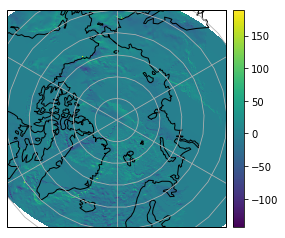

In [18]:
plot.from_dataset(ULON, ULAT, U_field_old[300,1:,:]-U_field_old[0,1:,:], latRange=(60,90), polar=True)

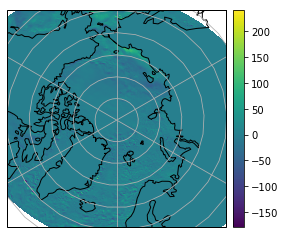

CPU times: user 4.96 s, sys: 717 ms, total: 5.68 s
Wall time: 5.09 s


In [13]:
%%time
plot.from_dataset(ULON, ULAT, U_field_new[300,:,:]-U_field_new[0,:,:], latRange=(60,90), polar=True)